In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Practice Notebook/Predict Mobile Price/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


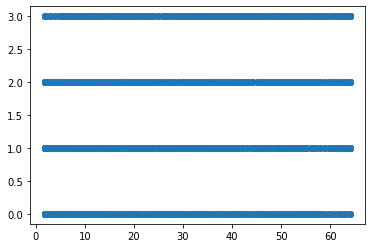

In [6]:
plt.scatter(df["int_memory"], df["price_range"])

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 0)

In [17]:
features = ['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train[features].values, train["price_range"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
labels = test["price_range"]
prediction_1 = model.predict(test[features].values)

print(np.sqrt(sklearn.metrics.mean_squared_error(labels, prediction_1)))

3.072587709780309e-14


In [21]:
model.coef_

array([-1.01878248e-19,  8.60769789e-15, -6.26305784e-15,  1.49059814e-15,
       -4.05487577e-16,  3.70180175e-15, -1.47946635e-17, -4.08820385e-16,
       -1.21838606e-16, -4.04220237e-17, -8.04237779e-17, -1.32067777e-17,
        6.17847266e-17, -1.65792212e-17, -9.42901132e-17,  8.78048898e-17,
       -9.39621899e-17,  2.45058490e-16, -9.25205618e-17, -2.39483743e-16,
        1.00000000e+00])

In [23]:
model.intercept_

-1.0436096431476471e-14

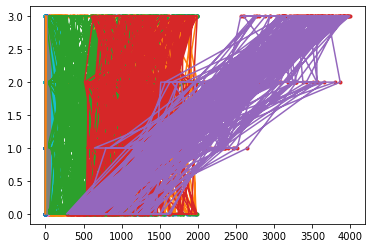

In [29]:
plt.plot(test[features], test["price_range"], ".", 
         test[features], model.predict(test[features].values))

In [38]:
phone_1 = df[df.index == 13]
phone_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
13,803,1,2.1,0,7,0,17,1.0,198,4,11,344,1440,2680,7,1,4,1,0,1,2


In [39]:
model.predict(phone_1[features].values)

array([2.])